# Neural Network

In [13]:
import numpy as np
import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.applications import EfficientNetV2B1
# from tensorflow.keras import regularizers
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,precision_score, recall_score
import matplotlib.pyplot as plt

seed = 42

## Data Processing

In [3]:
# load data
(x_train_val, y_train_val), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# normalize data
x_train_val = x_train_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# data split
X_train, X_test, Y_train, Y_test = train_test_split(
    x_train_val, y_train_val, test_size=0.2, random_state=1234, stratify=y_train_val
)
x_train = X_train[0:10000]
y_train = Y_train[0:10000]

In [4]:
print("size of training data:", x_train.shape)
print("size of test data:", x_test.shape)

size of training data: (10000, 32, 32, 3)
size of test data: (10000, 32, 32, 3)


In [5]:
# flatten data
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X_train flatten dimension:", X_train.shape)
print("X_test flatten dimension:", X_test.shape)

X_train flatten dimension: (10000, 3072)
X_test flatten dimension: (10000, 3072)


## Fitting Model

In [6]:
mlp = MLPClassifier(shuffle=True, random_state=seed, verbose=False)
mlp.fit(X_train, y_train)
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)
print("training accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)

/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accuracy: 0.5779
test accuracy: 0.1038


/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Hyperparameter Selection

##### **Learning Rate**

In [7]:
def errors_for_learning_rates_mlp(X_tr: np.array, y_tr: np.array, seed: int, learning_rates: list[float]) -> list[list]:
    err_curves = [] # append loss_curve_ from each MLP model to this list
    ### YOUR CODE STARTS HERE ###
    # MAKE SURE YOU ARE USING THE GIVEN ARGUMENT NAMES
    for lr in learning_rates:
        
        mlp = MLPClassifier(learning_rate_init=lr,random_state=seed, n_iter_no_change=100, max_iter=100)
        mlp.fit(X_tr, y_tr)
        
        err_curves.append(mlp.loss_curve_)
    return err_curves 

def plot_errors_for_learning_rates_mlp(err_curves: list[list], learning_rates: list[float], title) -> None:
    ### YOUR CODE STARTS HERE ###
    for i, curve in enumerate(err_curves):
        plt.plot(np.arange(len(curve)), curve, label=learning_rates[i])
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by 

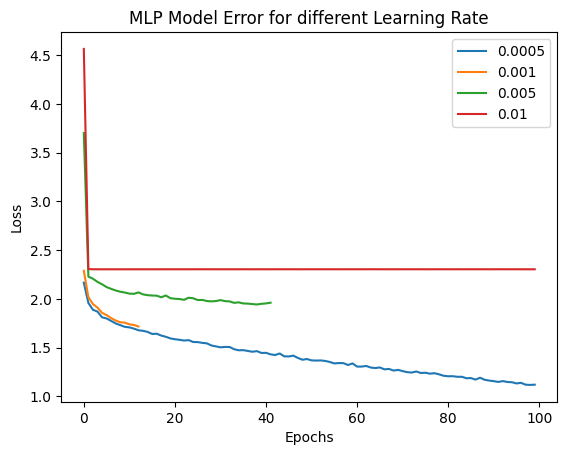

In [8]:
learning_rates = [0.0005, 0.001, 0.005, 0.01]
err_curves = errors_for_learning_rates_mlp(X_train, y_train, seed, learning_rates)
plot_errors_for_learning_rates_mlp(err_curves, learning_rates, "MLP Model Error for different Learning Rate")

##### **Alpha**

In [ ]:
def errors_for_alpha_mlp(X_tr: np.array, y_tr: np.array, seed: int, alphas: list[float]) -> list[list]:
    err_curves = [] # append loss_curve_ from each MLP model to this list
    ### YOUR CODE STARTS HERE ###
    # MAKE SURE YOU ARE USING THE GIVEN ARGUMENT NAMES
    for a in alphas:
        
        mlp = MLPClassifier(alpha=a,random_state=seed, n_iter_no_change=100, max_iter=100)
        mlp.fit(X_tr, y_tr)
        
        err_curves.append(mlp.loss_curve_)
    return err_curves 

/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimi

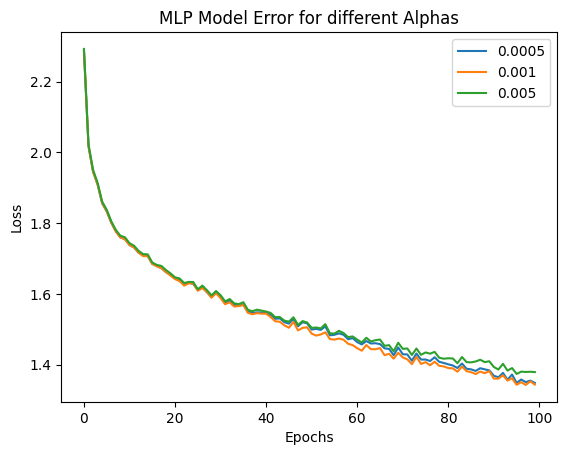

In [ ]:
alphas = [0.0001, 0.001, 0.01]
err_curves = errors_for_alpha_mlp(X_train, y_train, seed, alphas)
plot_errors_for_learning_rates_mlp(err_curves, learning_rates, "MLP Model Error for different Alphas")

##### **Hidden Layer**

In [ ]:
def errors_for_layer_mlp(X_tr: np.array, y_tr: np.array, seed: int, hidden_layers: list) -> list[list]:
    err_curves = [] # append loss_curve_ from each MLP model to this list
    ### YOUR CODE STARTS HERE ###
    # MAKE SURE YOU ARE USING THE GIVEN ARGUMENT NAMES
    for layer in hidden_layers:
        
        mlp = MLPClassifier(hidden_layer_sizes=layer,random_state=seed, n_iter_no_change=100, max_iter=100)
        mlp.fit(X_tr, y_tr)
        
        err_curves.append(mlp.loss_curve_)
    return err_curves 

/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimi

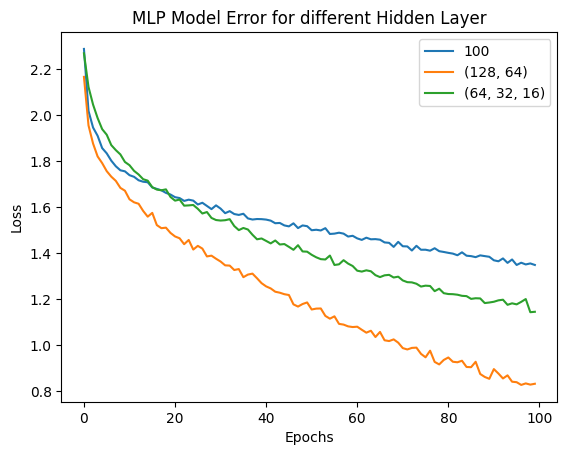

In [ ]:
hidden_layer_sizes= [(100,), (128, 64), (64, 32, 16)]
err_curves = errors_for_layer_mlp(X_train, y_train, seed, hidden_layer_sizes)
plot_errors_for_learning_rates_mlp(err_curves, hidden_layer_sizes, "MLP Model Error for different Hidden Layer")

### Use Tested Good Hyperparameter to Fit Model

In [ ]:
mlp2 = MLPClassifier(learning_rate_init=0.0005, hidden_layer_sizes=(128, 64), random_state=seed)
mlp2.fit(X_train, y_train)
train_accuracy = mlp2.score(X_train, y_train)
test_accuracy = mlp2.score(X_test, y_test)
print("training accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)


/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accuracy: 0.8509
test accuracy: 0.1033


/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp2 = MLPClassifier(learning_rate_init=0.0005, hidden_layer_sizes=(128, 64),alpha=1e-4, 
                    early_stopping=True, validation_fraction=0.2, random_state=seed)
mlp2.fit(X_train, y_train)
train_accuracy = mlp2.score(X_train, y_train)
test_accuracy = mlp2.score(X_test, y_test)
print("training accuracy:", train_accuracy)
print("test accuracy:", test_accuracy)

/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accuracy: 0.5275
test accuracy: 0.1011


In [16]:
y_predict = mlp2.predict(X_test)

f1_result = f1_score(y_test, y_predict, average = 'weighted')
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
print(f1_result)
print(precision)
print(recall)

0.0985507885739391
0.10024756999346521
0.1011


## Plotting Learning Curve

In [10]:
sample_sizes = [2000, 4000, 6000, 10000]
train_accuracies = []
test_accuracies =[]

for size in sample_sizes:
    train_df = X_train[:size]
    y_df = y_train[:size]
    mlp2 = MLPClassifier(learning_rate_init=0.0005, hidden_layer_sizes=(128, 64),alpha=1e-4, 
                    early_stopping=True, validation_fraction=0.2, random_state=seed, )
    mlp2.fit(train_df, y_df)
    train_accuracy = mlp2.score(train_df, y_df)
    test_accuracy = mlp2.score(X_test, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_p

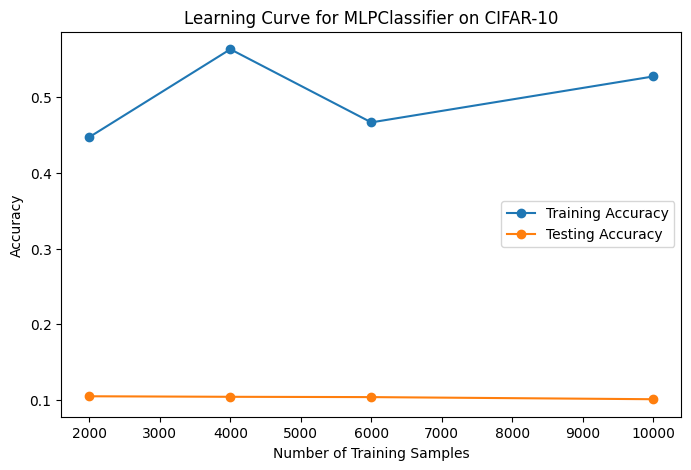

In [11]:


plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(sample_sizes, test_accuracies, marker='o', label='Testing Accuracy')
plt.title('Learning Curve for MLPClassifier on CIFAR-10')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
